# Benchmarking LLM reasoning capabilities

Este notebook é um laboratório prático para benchmarking de modelos de linguagem de grande porte (LLMs), como GPT-4.1, GPT-4o, Gemini e DeepSeek. Ele avalia e compara latência de resposta, custo, desempenho em tarefas de geração de texto, visão computacional e resolução de questões complexas. O objetivo é fornecer uma análise detalhada e prática sobre a performance, precisão e custo-benefício de cada modelo em diferentes cenários de uso.

In [6]:
# Install dependencies
%pip install -r requirements.txt


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### .env

Este LAB requer que as seguintes variáveis de ambiente sejam configuradas antes da execução:

- `GROG_API_KEY`: Sua chave de API para acessar os serviços da Groq.
- `OPENAI_API_KEY`: Sua chave de API para acessar os serviços da OpenAI.
- `GEMINI_API_KEY`: Sua chave de API para acessar os serviços da Gemini.
- `ANTROPIC_API_KEY`: Sua chave de API para acessar os serviços da Anthropic.
- `OPENAI_API_VERSION`: A versão da API da OpenAI que você está usando (por exemplo, "2024-05-01-preview").

Certifique-se de que essas variáveis de ambiente estejam devidamente configuradas no seu ambiente para executar o script com sucesso.

**DeepSeak (LAB Azure AI foundry)**

**Gemini (LAB google studio)**

**Openai (Plataform openai)**


In [7]:
#libs
from openai import OpenAI
from dotenv import load_dotenv
import time
import json
from google import genai
from typing import Optional
import os
import matplotlib.pyplot as plt
import base64
import pandas as pd
import re
import json
from groq import Groq
import anthropic

load_dotenv()


True

# Latência de resposta

In [8]:
# Data
Result_execution_time = {
    "Model": {}
}

In [9]:
# time of execution model openai
def gpt_completation_time_response(model: str, message: str):
    Result_execution_time["Model"][f"{model}"] = []
    for i in range(5):
        start_time = time.time()
        client = OpenAI()
        completion = client.chat.completions.create(
            model=f"{model}",
            store=True,
            messages=[
                {"role": "user", "content": f"{message}"},
            ]
        )
        completion
        end_time = time.time()
        #print(f"Tempo de resposta: {end_time - start_time} segundos para o modelo {model} na tentativa {i+1}")
        Result_execution_time["Model"][f"{model}"].append(end_time - start_time)

    return Result_execution_time

In [10]:
#time of execution model google
load_dotenv()
def gemini_completation_time_response(model: str, message: str):
    Result_execution_time["Model"][f"{model}"] = []
    GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")
    client = genai.Client(api_key=f"{GEMINI_API_KEY}")
    for i in range(5):
        start_time = time.time()
        response = client.models.generate_content(
            model=f"{model}",
            contents=[f"{message}"])
        response
        end_time = time.time()
        #print(f"Tempo de resposta: {end_time - start_time} segundos para o modelo {model} na tentativa {i+1}")
        Result_execution_time["Model"][f"{model}"].append(end_time - start_time)

In [11]:
#time of execution model anthropic
def anthropic_completation_time_response(model: str, message: str):
    Result_execution_time["Model"][f"{model}"] = []
    ANTHROPIC_API_KEY = os.getenv("ANTHROPIC_API_KEY")
    client = anthropic.Anthropic(api_key=ANTHROPIC_API_KEY)
    for i in range(5):
        start_time = time.time()
        response = client.messages.create(
            model=f"{model}",
            max_tokens=32000,
            messages=[
                {
                    "role": "user",
                    "content": [
                        {
                            "type": "text",
                            "text": f"{message}"
                        }
                    ]
                }
            ],
            stream=True
        )
        end_time = time.time()
        Result_execution_time["Model"][f"{model}"].append(end_time - start_time)
    return Result_execution_time

In [12]:
#time of execution model groq
def groq_completation_time_response(model: str, message: str):
    Result_execution_time["Model"][f"{model}"] = []
    for i in range(5):
        start_time = time.time()
        client = Groq(api_key=os.getenv("GROG_API_KEY"))
        completion = client.chat.completions.create(
            model=f"{model}",
            messages=[
                {"role": "user", "content": f"{message}"},
            ]
        )
        completion
        end_time = time.time()
        #print(f"Tempo de resposta: {end_time - start_time} segundos para o modelo {model} na tentativa {i+1}")
        Result_execution_time["Model"][f"{model}"].append(end_time - start_time)

    return Result_execution_time

In [13]:
#Message
message ="Create a new text for me with theme about the future of technology, content 200 characters"

In [14]:
#Models Google
execution = gemini_completation_time_response("gemini-2.5-flash", message)
execution = gemini_completation_time_response("gemini-2.5-flash-lite", message)
execution = gemini_completation_time_response("gemma-3-27b-it", message)

In [15]:
#model OpenAI hosted in groq 
execution = groq_completation_time_response("openai/gpt-oss-120b", message)
execution = groq_completation_time_response("openai/gpt-oss-20b", message)

#Models OpenAI
execution = gpt_completation_time_response("gpt-4.1-mini", message)
execution = gpt_completation_time_response("o1-mini", message)
execution = gpt_completation_time_response("o3-mini", message)


In [16]:
#Model anthropic
execution = anthropic_completation_time_response("claude-opus-4-1-20250805", message)
execution = anthropic_completation_time_response("claude-sonnet-4-20250514", message)

In [17]:
# Result json
print(json.dumps(Result_execution_time, indent=4))

{
    "Model": {
        "gemini-2.5-flash": [
            2.887091875076294,
            1.0612208843231201,
            3.7071969509124756,
            4.225039005279541,
            1.778836965560913
        ],
        "gemini-2.5-flash-lite": [
            1.4520618915557861,
            1.3683390617370605,
            1.346780776977539,
            1.3811190128326416,
            1.3763227462768555
        ],
        "gemma-3-27b-it": [
            5.357847213745117,
            5.245892763137817,
            5.733144760131836,
            5.410977125167847,
            4.580480098724365
        ],
        "openai/gpt-oss-120b": [
            11.282408237457275,
            6.059171199798584,
            7.099591016769409,
            10.923390865325928,
            6.033994197845459
        ],
        "openai/gpt-oss-20b": [
            1.8373851776123047,
            2.261240005493164,
            1.914395809173584,
            0.8815450668334961,
            1.1709718704223633


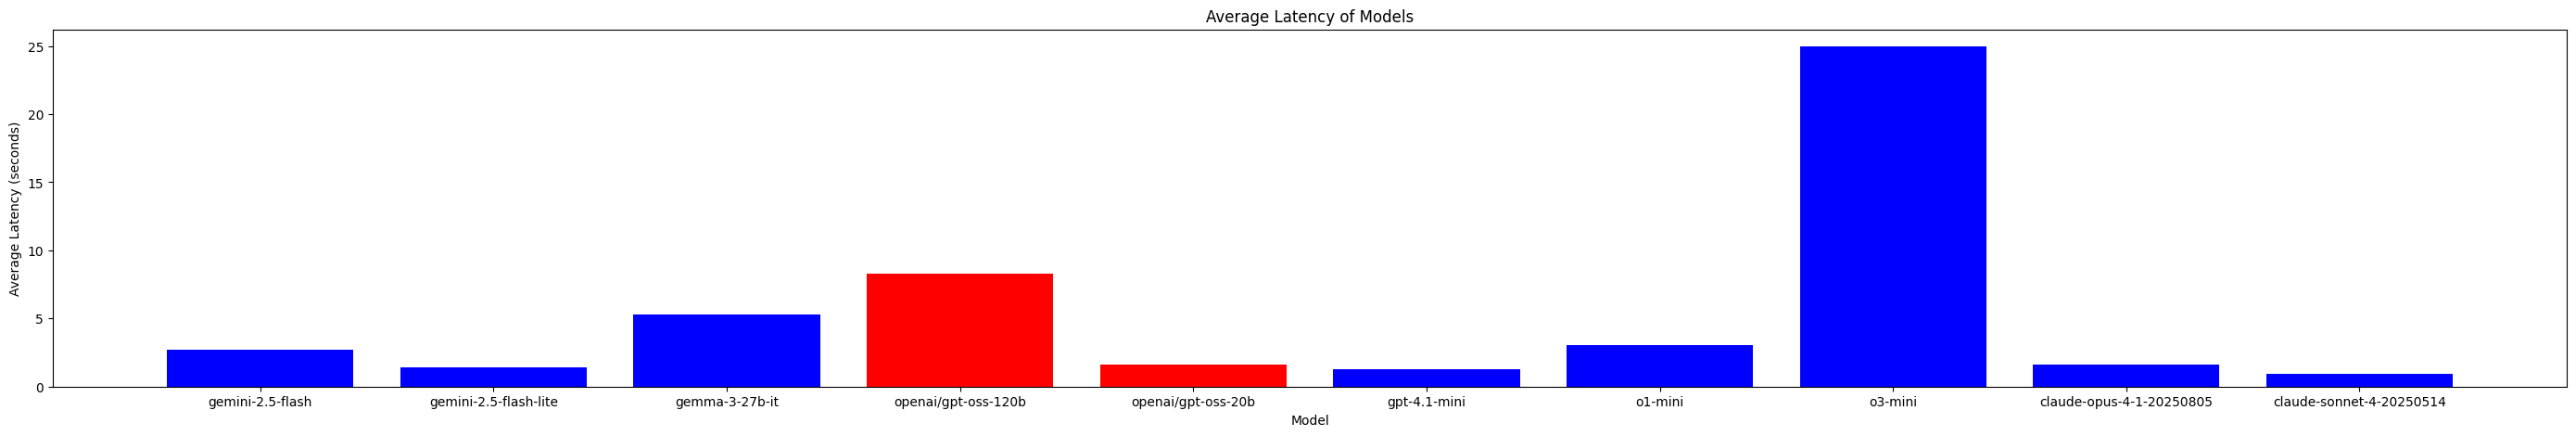

In [18]:
# Average latency for each model
average_latency = {model: sum(times) / len(times) for model, times in Result_execution_time["Model"].items()}

# Define cores: vermelho para os modelos especificados, azul para os demais
bar_colors = [
    "red" if model in ["openai/gpt-oss-120b", "openai/gpt-oss-20b"] else "blue"
    for model in average_latency.keys()
]

# Plot the results
plt.figure(figsize=(35, 5))
plt.bar(average_latency.keys(), average_latency.values(), color=bar_colors)
plt.xlabel('Model')
plt.ylabel('Average Latency (seconds)')
plt.title('Average Latency of Models')
plt.show()

# Resolução de provas (Problemas complexos)


In [19]:
# template
template = {
    "matemática": ["C", "C", "A"],
    "física": ["C", "C"],
    "química": ["C", "A"]
}

#Result - Incluindo todos os modelos do benchmark
result = {
    # Modelos OpenAI
    "gpt-4.1-mini": {
        "matemática": [],
        "física": [],
        "química": []
    },
    "gpt-4o": {
        "matemática": [],
        "física": [],
        "química": []
    },
    "o1-mini": {
        "matemática": [],
        "física": [],
        "química": []
    },
    "o3-mini": {
        "matemática": [],
        "física": [],
        "química": []
    },
    # Modelos Google/Gemini
    "gemini-2.5-flash": {
        "matemática": [],
        "física": [],
        "química": []
    },
    "gemini-2.5-flash-lite": {
        "matemática": [],
        "física": [],
        "química": []
    },
    "gemma-3-27b-it": {
        "matemática": [],
        "física": [],
        "química": []
    },
    # Modelos Anthropic
    "claude-opus-4-1-20250805": {
        "matemática": [],
        "física": [],
        "química": []
    },
    "claude-sonnet-4-20250514": {
        "matemática": [],
        "física": [],
        "química": []
    },
    # Modelos OpenAI hospedados no Groq
    "openai/gpt-oss-120b": {
        "matemática": [],
        "física": [],
        "química": []
    },
    "openai/gpt-oss-20b": {
        "matemática": [],
        "física": [],
        "química": []
    }
}

In [20]:
# OCR of tests
def vision_question( prompt: str, image_path: str):
    client = OpenAI()
    with open(image_path, "rb") as image_file:
        encoded_image = base64.b64encode(image_file.read()).decode("utf-8")

    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text" : f"{prompt}" 
                    },
                    {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/jpeg;base64,{encoded_image}"},
                    },
                ],
            }
        ]
    )
    return response.choices[0].message.content

In [ ]:
# Função de completação de texto para diferentes modelos
def completation(model: str, message: str, output_format: Optional[str] = None):
    """
    Função universal para fazer completações de texto com diferentes modelos
    """
    try:
        # Modelos OpenAI
        if model in ["gpt-4o", "gpt-4.1-mini", "o1-mini", "o3-mini", "gpt-4.1"]:
            client = OpenAI()
            completion = client.chat.completions.create(
                model=model,
                messages=[
                    {"role": "user", "content": message}
                ],
                response_format={"type": output_format}
            )
            return completion.choices[0].message.content
        
        # Modelos Gemini/Google
        elif model in ["gemini-2.5-flash", "gemini-2.5-flash-lite", "gemma-3-27b-it"]:
            GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")
            client = genai.Client(api_key=GEMINI_API_KEY)
            response = client.models.generate_content(
                model=model,
                contents=[message]
            )
            return response.text
        
        # Modelos Anthropic
        elif model in ["claude-opus-4-1-20250805", "claude-sonnet-4-20250514"]:
            ANTHROPIC_API_KEY = os.getenv("ANTHROPIC_API_KEY")
            client = anthropic.Anthropic(api_key=ANTHROPIC_API_KEY)
            response = client.messages.create(
                model=model,
                max_tokens=4000,
                messages=[
                    {
                        "role": "user",
                        "content": message
                    }
                ]
            )
            return response.content[0].text
        
        # Modelos OpenAI hospedados no Groq
        elif model in ["openai/gpt-oss-120b", "openai/gpt-oss-20b"]:
            client = Groq(api_key=os.getenv("GROG_API_KEY"))
            completion = client.chat.completions.create(
                model=model,
                messages=[
                    {"role": "user", "content": message}
                ]
            )
            return completion.choices[0].message.content
        
        else:
            return f"Modelo {model} não suportado"
            
    except Exception as e:
        return f"Erro ao processar modelo {model}: {str(e)}"



### Química

In [22]:
# extract question 1
describe_image = vision_question("essa é uma questão da fuvest, extraia todo o enunciado e a pergunta","/Users/leonardojdss/Desktop/projetos/benchmark-LLM/dados/question_1_fuvest__quimica_c.png")
prompt = "Resolva o problema e indique a resposta sendo a alternativa correta: " + describe_image
print(describe_image)

12

Para exemplificar probabilidade, um grupo de estudantes fez uma atividade envolvendo química, conforme o procedimento descrito.

Cada estudante recebeu um recipiente contendo 800 mL de água destilada com algumas gotas do indicador de pH alaranjado de metila e soluções de HCl e NaOH em diversas concentrações.

Cada estudante deveria jogar apenas uma vez dois dados, um amarelo e um vermelho, ambos contendo os números de 1 a 6.

- Ao jogar o dado vermelho, o estudante deveria adicionar ao recipiente 100 mL de solução do ácido clorídrico na concentração \(10^{-n}\) mol/L, sendo n o número marcado no dado (por exemplo, se saísse o número 1 no dado, a solução seria de \(10^{-1}\) mol/L; se saísse 6, a solução seria de \(10^{-6}\) mol/L).

- Ao jogar o dado amarelo, o estudante deveria executar o mesmo procedimento, mas substituindo o ácido por NaOH, totalizando assim 1,0 L de solução.

- O estudante deveria observar a cor da solução ao final do experimento.

A professora mostrou a tabela

In [23]:
# gpt-4.1-mini
response_question = completation("gpt-4.1-mini", f"{prompt}", "text")
print(response_question)
result["gpt-4.1-mini"]["química"].append(response_question)

# 01-mini
response_question = completation("o1-mini", f"{prompt} {describe_image}", "text")
print(response_question)
result["o1-mini"]["química"].append(response_question)

#o3-mini
response_question = completation("o3-mini", f"{prompt} {describe_image}", "text")
print(response_question)
result["o3-mini"]["química"].append(response_question)

# openai/gpt-oss-120b
response_question = completation("openai/gpt-oss-120b", f"{prompt} {describe_image}", "text")
print(response_question)
result["openai/gpt-oss-120b"]["química"].append(response_question)

# openai/gpt-oss-20b
response_question = completation("openai/gpt-oss-20b", f"{prompt} {describe_image}", "text")
print(response_question)
result["openai/gpt-oss-20b"]["química"].append(response_question)

#claude-opus-4-1-20250805
response_question = completation("claude-opus-4-1-20250805", f"{prompt} {describe_image}")
print(response_question)
result["claude-opus-4-1-20250805"]["química"].append(response_question)

# claude-sonnet-4-20250514
response_question = completation("claude-sonnet-4-20250514", f"{prompt} {describe_image}")
print(response_question)
result["claude-sonnet-4-20250514"]["química"].append(response_question)

# gemini-2.5-flash
response_question = completation("gemini-2.5-flash", f"{prompt} {describe_image}")
print(response_question)
result["gemini-2.5-flash"]["química"].append(response_question)

# gemini-2.5-flash-lite
response_question = completation("gemini-2.5-flash-lite", f"{prompt} {describe_image}")
print(response_question)
result["gemini-2.5-flash-lite"]["química"].append(response_question)

# gemma-3-27b-it
response_question = completation("gemma-3-27b-it", f"{prompt} {describe_image}")
print(response_question)
result["gemma-3-27b-it"]["química"].append(response_question)

Vamos entender o problema passo a passo.

---

### Contexto e dados do problema:

- Cada estudante lança **dois dados**, um vermelho e um amarelo, ambos de 1 a 6.
- O dado vermelho indica a concentração de ácido clorídrico (HCl), na forma \(10^{-n}\) mol/L, onde \(n\) é o número do dado vermelho.
- O dado amarelo indica a concentração de hidróxido de sódio (NaOH), também na forma \(10^{-m}\) mol/L, onde \(m\) é o número do dado amarelo.
- Em cada caso, são adicionados 100 mL das soluções ao mesmo recipiente inicial (800 mL de água) para totalizar 1 litro.
- O estudante deve observar a cor da solução. A cor "vermelha" ocorre se e somente se a solução final for **ácida** (indicador de metila é vermelho em solução ácida: pH < 3.1, cor laranja em pH intermediário, amarelo em básico).

---

### Objetivo:

Determinar a probabilidade da solução final ser vermelha, ou seja, da solução final ser **ácida**, considerando as concentrações indicadas pelos dados.

---

### Passo 1: Modelar o problem

In [24]:
#Questão 2
describe_image = vision_question("essa é uma questão da fuvest, extraia todo o enunciado e a pergunta","dados/question_2_fuvest_quimica_a.png")
prompt = "Resolva o problema e indique a resposta sendo a alternativa correta: " + describe_image
print(describe_image)

Quando o nosso corpo é lesionado por uma pancada, logo se cria um hematoma que, ao longo do tempo, muda de cor. Inicialmente, o hematoma torna-se avermelhado pelo acúmulo de hemoglobina. Em seguida, surge uma coloração azulada, decorrente da perda do O₂ ligado ao Fe do grupo heme. Essa coloração torna-se, então, esverdeada (biliverdina) e, após isso, surge um tom amarelado na pele (bilirrubina). Essa sequência de cores ocorre pela transformação do grupo heme da hemoglobina, como representado a seguir:

Com base nas informações e nas representações, é correto afirmar:

(A) A conversão da biliverdina em bilirrubina ocorre por meio de uma redução.
(B) A biliverdina, assim como a hemoglobina, é capaz de transportar O₂ para as células do corpo, pois há oxigênio ligado na molécula.
(C) As três estruturas apresentadas contêm o grupo funcional amida.
(D) A degradação do grupo heme para a formação da biliverdina produz duas cetonas.
(E) O grupo heme, a biliverdina e a bilirrubina são isômeros.


In [25]:
# gpt-4.1-mini
response_question = completation("gpt-4.1-mini", f"{prompt}", "text")
print(response_question)
result["gpt-4.1-mini"]["química"].append(response_question)

# 01-mini
response_question = completation("o1-mini", f"{prompt} {describe_image}", "text")
print(response_question)
result["o1-mini"]["química"].append(response_question)

#o3-mini
response_question = completation("o3-mini", f"{prompt} {describe_image}", "text")
print(response_question)
result["o3-mini"]["química"].append(response_question)

# openai/gpt-oss-120b
response_question = completation("openai/gpt-oss-120b", f"{prompt} {describe_image}", "text")
print(response_question)
result["openai/gpt-oss-120b"]["química"].append(response_question)

# openai/gpt-oss-20b
response_question = completation("openai/gpt-oss-20b", f"{prompt} {describe_image}", "text")
print(response_question)
result["openai/gpt-oss-20b"]["química"].append(response_question)

#claude-opus-4-1-20250805
response_question = completation("claude-opus-4-1-20250805", f"{prompt} {describe_image}")
print(response_question)
result["claude-opus-4-1-20250805"]["química"].append(response_question)

# claude-sonnet-4-20250514
response_question = completation("claude-sonnet-4-20250514", f"{prompt} {describe_image}")
print(response_question)
result["claude-sonnet-4-20250514"]["química"].append(response_question)

# gemini-2.5-flash
response_question = completation("gemini-2.5-flash", f"{prompt} {describe_image}")
print(response_question)
result["gemini-2.5-flash"]["química"].append(response_question)

# gemini-2.5-flash-lite
response_question = completation("gemini-2.5-flash-lite", f"{prompt} {describe_image}")
print(response_question)
result["gemini-2.5-flash-lite"]["química"].append(response_question)

# gemma-3-27b-it
response_question = completation("gemma-3-27b-it", f"{prompt} {describe_image}")
print(response_question)
result["gemma-3-27b-it"]["química"].append(response_question)

Vamos analisar uma a uma as alternativas, com base na transformação do grupo heme da hemoglobina, que ocorre da seguinte forma:

- **Heme** (com ferro ligado ao O2 e grupos específicos)
- **Biliverdina** (composto verde, produto inicial da degradação do heme)
- **Bilirrubina** (composto amarelo, produto posterior à biliverdina)

---

### (A) A conversão da biliverdina em bilirrubina ocorre por meio de uma redução.

- Na degradação do grupo heme, a biliverdina é convertida em bilirrubina por redução enzimática (enzima biliverdina redutase). Isso porque algumas ligações duplas na biliverdina são reduzidas para formar a bilirrubina.
- Esta alternativa está correta.

---

### (B) A biliverdina, assim como a hemoglobina, é capaz de transportar O₂ para as células do corpo, pois há oxigênio ligado na molécula.

- A hemoglobina é uma proteína capaz de transportar O₂, pois tem ferro (Fe) no centro do grupo heme que faz essa função.
- A biliverdina é um produto da degradação do heme e não possui

## Matemática


In [26]:
#Questão 1
describe_image = vision_question("essa é uma questão da fuvest, extraia todo o enunciado e a pergunta","dados/question_1_fuvest_mat_c.png")
prompt = "Resolva o problema e indique a resposta sendo a alternativa correta: " + describe_image
print(describe_image)

**19**

A função \( E \) de Euler determina, para cada número natural \( n \), a quantidade de números naturais menores do que \( n \) cujo máximo divisor comum com \( n \) é igual a 1. Por exemplo, \( E(6) = 2 \) pois os números menores do que 6 com tal propriedade são 1 e 5. Qual o valor máximo de \( E(n) \), para \( n \) de 20 a 25?

(A) 19  
(B) 20  
(C) 22  
(D) 24  
(E) 25  


In [27]:
# gpt-4.1-mini
response_question = completation("gpt-4.1-mini", f"{prompt}", "text")
print(response_question)
result["gpt-4.1-mini"]["matemática"].append(response_question)

# 01-mini
response_question = completation("o1-mini", f"{prompt} {describe_image}", "text")
print(response_question)
result["o1-mini"]["matemática"].append(response_question)

#o3-mini
response_question = completation("o3-mini", f"{prompt} {describe_image}", "text")
print(response_question)
result["o3-mini"]["matemática"].append(response_question)

# openai/gpt-oss-120b
response_question = completation("openai/gpt-oss-120b", f"{prompt} {describe_image}", "text")
print(response_question)
result["openai/gpt-oss-120b"]["matemática"].append(response_question)

# openai/gpt-oss-20b
response_question = completation("openai/gpt-oss-20b", f"{prompt} {describe_image}", "text")
print(response_question)
result["openai/gpt-oss-20b"]["matemática"].append(response_question)

#claude-opus-4-1-20250805
response_question = completation("claude-opus-4-1-20250805", f"{prompt} {describe_image}")
print(response_question)
result["claude-opus-4-1-20250805"]["matemática"].append(response_question)

# claude-sonnet-4-20250514
response_question = completation("claude-sonnet-4-20250514", f"{prompt} {describe_image}")
print(response_question)
result["claude-sonnet-4-20250514"]["matemática"].append(response_question)

# gemini-2.5-flash
response_question = completation("gemini-2.5-flash", f"{prompt} {describe_image}")
print(response_question)
result["gemini-2.5-flash"]["matemática"].append(response_question)

# gemini-2.5-flash-lite
response_question = completation("gemini-2.5-flash-lite", f"{prompt} {describe_image}")
print(response_question)
result["gemini-2.5-flash-lite"]["matemática"].append(response_question)

# gemma-3-27b-it
response_question = completation("gemma-3-27b-it", f"{prompt} {describe_image}")
print(response_question)
result["gemma-3-27b-it"]["matemática"].append(response_question)

Queremos calcular \( E(n) = \varphi(n) \), a função totiente de Euler, para \( n = 20, 21, 22, 23, 24, 25 \), e encontrar o valor máximo.

A função \(\varphi(n)\) conta os números menores que \(n\) e coprimos com \(n\).

Vamos calcular \(\varphi(n)\) para cada \(n\):

---

### 1) Para \( n = 20 \)

Fatoração: \( 20 = 2^2 \times 5 \)

\[
\varphi(20) = 20 \times \left(1 - \frac{1}{2}\right) \times \left(1 - \frac{1}{5}\right) 
= 20 \times \frac{1}{2} \times \frac{4}{5} = 20 \times \frac{4}{10} = 8
\]

---

### 2) Para \( n = 21 \)

Fatoração: \( 21 = 3 \times 7 \)

\[
\varphi(21) = 21 \times \left(1 - \frac{1}{3}\right) \times \left(1 - \frac{1}{7}\right) 
= 21 \times \frac{2}{3} \times \frac{6}{7} = 21 \times \frac{12}{21} = 12
\]

---

### 3) Para \( n = 22 \)

Fatoração: \( 22 = 2 \times 11 \)

\[
\varphi(22) = 22 \times \left(1 - \frac{1}{2}\right) \times \left(1 - \frac{1}{11}\right) 
= 22 \times \frac{1}{2} \times \frac{10}{11} = 22 \times \frac{10}{22} = 10
\]

---

### 4) Para \(

In [28]:
#Questão 2
describe_image = vision_question("essa é uma questão da fuvest, extraia todo o enunciado e a pergunta","dados/question_2_ita_mat_c.png")
prompt = "Resolva o problema e indique a resposta sendo a alternativa correta: " + describe_image
print(describe_image)

Dizemos que a representação binária de um número \( N \in \mathbb{N} \) da forma

\[ N = g \cdot 2^0 + f \cdot 2^1 + e \cdot 2^2 + d \cdot 2^3 + c \cdot 2^4 + b \cdot 2^5 + a \cdot 2^6 \]

é \((abcdefg)_2\), onde \( a, b, c, d, e, f, g \in \{ 0, 1 \} \) e omitem-se os algarismos 0 até o primeiro algarismo 1 da esquerda para a direita. Seja \( k \) um número inteiro tal que \( 1 \leq k \leq 100 \).

Qual a probabilidade de \( k \) e \( k + 1 \) terem representações binárias com um número distinto de algarismos?

a) 2%

b) 4%

c) 6%

d) 8%

e) 10%


In [29]:
# gpt-4.1-mini
response_question = completation("gpt-4.1-mini", f"{prompt}", "text")
print(response_question)
result["gpt-4.1-mini"]["matemática"].append(response_question)

# 01-mini
response_question = completation("o1-mini", f"{prompt} {describe_image}", "text")
print(response_question)
result["o1-mini"]["matemática"].append(response_question)

#o3-mini
response_question = completation("o3-mini", f"{prompt} {describe_image}", "text")
print(response_question)
result["o3-mini"]["matemática"].append(response_question)

# openai/gpt-oss-120b
response_question = completation("openai/gpt-oss-120b", f"{prompt} {describe_image}", "text")
print(response_question)
result["openai/gpt-oss-120b"]["matemática"].append(response_question)

# openai/gpt-oss-20b
response_question = completation("openai/gpt-oss-20b", f"{prompt} {describe_image}", "text")
print(response_question)
result["openai/gpt-oss-20b"]["matemática"].append(response_question)

#claude-opus-4-1-20250805
response_question = completation("claude-opus-4-1-20250805", f"{prompt} {describe_image}")
print(response_question)
result["claude-opus-4-1-20250805"]["matemática"].append(response_question)

# claude-sonnet-4-20250514
response_question = completation("claude-sonnet-4-20250514", f"{prompt} {describe_image}")
print(response_question)
result["claude-sonnet-4-20250514"]["matemática"].append(response_question)

# gemini-2.5-flash
response_question = completation("gemini-2.5-flash", f"{prompt} {describe_image}")
print(response_question)
result["gemini-2.5-flash"]["matemática"].append(response_question)

# gemini-2.5-flash-lite
response_question = completation("gemini-2.5-flash-lite", f"{prompt} {describe_image}")
print(response_question)
result["gemini-2.5-flash-lite"]["matemática"].append(response_question)

# gemma-3-27b-it
response_question = completation("gemma-3-27b-it", f"{prompt} {describe_image}")
print(response_question)
result["gemma-3-27b-it"]["matemática"].append(response_question)

Vamos analisar o problema passo a passo.

---

### Enunciado resumido:

- \( k \in \{1, 2, \dots, 100\} \).
- A representação binária de \( k \) tem um número \( n_k \) de algarismos (bits).
- A representação binária de \( k+1 \) pode ter um número \( n_{k+1} \) de algarismos.
- Queremos calcular a probabilidade de \( n_k \neq n_{k+1} \), ou seja, a probabilidade de \( k \) e \( k+1 \) terem números binários de **tamanhos diferentes**.

---

### Análise do problema:

Na forma binária de um número, o número de bits é dado pela posição do bit mais à esquerda com valor 1.

Por exemplo:  
- \(7_{10} = 111_2\) tem 3 bits.  
- \(8_{10} = 1000_2\) tem 4 bits.

A quantidade de bits só vai mudar quando passamos de um número do tipo \(2^m - 1\) para \(2^m\).

> Por exemplo:  
> - \(7 = 111_2\), 3 bits.  
> - \(8 = 1000_2\), 4 bits. Aqui houve mudança do número de bits.

Logo, **o número de bits da representação binária aumenta em 1 somente quando passamos de \(2^m - 1\) para \(2^m\)**.

---

###

In [30]:
#Questão 3
describe_image = vision_question("essa é uma questão da fuvest, extraia todo o enunciado e a pergunta","dados/question_3_fuvest_mat_a.png")
prompt = "Resolva o problema e indique a resposta sendo a alternativa correta: " + describe_image
print(describe_image)

Seja \( (a_n) \) uma progressão aritmética cujo primeiro termo é \( a_1 \) e a razão \( r \), ambos números reais. É possível construir uma outra sequência \( (b_n) \), em que o primeiro termo é um número real \( b_1 \) e com a seguinte lei de formação

\[ b_{n+1} = b_n + a_n \],

sendo \( n > 0 \) um número natural.

Por exemplo, se \( b_1 = 0 \) e 

\( (a_n) = (1,3,5,7,9,11,...) \),

tem-se

\( (b_n) = (0,1,4,9,16,25,...) \).

Com base em tais informações, os valores de \( a_1 \) e \( r \) foram escolhidos de forma que \( (b_n) \) também seja uma progressão aritmética de razão \( r' \). Nessas condições, é correto afirmar:

(A) \( r' = a_1 \)

(B) \( r' = 2a_1 \)

(C) \( r' = r \)

(D) \( r' = 2r \)

(E) \( r' = b_1 - a_1 \)


In [31]:
# gpt-4.1-mini
response_question = completation("gpt-4.1-mini", f"{prompt}", "text")
print(response_question)
result["gpt-4.1-mini"]["matemática"].append(response_question)

# 01-mini
response_question = completation("o1-mini", f"{prompt} {describe_image}", "text")
print(response_question)
result["o1-mini"]["matemática"].append(response_question)

#o3-mini
response_question = completation("o3-mini", f"{prompt} {describe_image}", "text")
print(response_question)
result["o3-mini"]["matemática"].append(response_question)

# openai/gpt-oss-120b
response_question = completation("openai/gpt-oss-120b", f"{prompt} {describe_image}", "text")
print(response_question)
result["openai/gpt-oss-120b"]["matemática"].append(response_question)

# openai/gpt-oss-20b
response_question = completation("openai/gpt-oss-20b", f"{prompt} {describe_image}", "text")
print(response_question)
result["openai/gpt-oss-20b"]["matemática"].append(response_question)

#claude-opus-4-1-20250805
response_question = completation("claude-opus-4-1-20250805", f"{prompt} {describe_image}")
print(response_question)
result["claude-opus-4-1-20250805"]["matemática"].append(response_question)

# claude-sonnet-4-20250514
response_question = completation("claude-sonnet-4-20250514", f"{prompt} {describe_image}")
print(response_question)
result["claude-sonnet-4-20250514"]["matemática"].append(response_question)

# gemini-2.5-flash
response_question = completation("gemini-2.5-flash", f"{prompt} {describe_image}")
print(response_question)
result["gemini-2.5-flash"]["matemática"].append(response_question)

# gemini-2.5-flash-lite
response_question = completation("gemini-2.5-flash-lite", f"{prompt} {describe_image}")
print(response_question)
result["gemini-2.5-flash-lite"]["matemática"].append(response_question)

# gemma-3-27b-it
response_question = completation("gemma-3-27b-it", f"{prompt} {describe_image}")
print(response_question)
result["gemma-3-27b-it"]["matemática"].append(response_question)

Dado:

- \( (a_n) \) é uma progressão aritmética (PA) com primeiro termo \( a_1 \) e razão \( r \).
- A sequência \( (b_n) \) é definida por:

\[
b_{n+1} = b_n + a_n, \quad n > 0,
\]

com \( b_1 \) dado.

Queremos entender quando \( (b_n) \) também é uma PA, isto é, quando existe um \( r' \) tal que

\[
b_{n+1} = b_n + r' \quad \forall n.
\]

---

### Passo 1: Expressar \( b_n \) em termos de \( a_n \).

Sabemos que

\[
b_2 = b_1 + a_1
\]
\[
b_3 = b_2 + a_2 = b_1 + a_1 + a_2
\]
\[
b_4 = b_3 + a_3 = b_1 + a_1 + a_2 + a_3
\]

E assim por diante. De forma geral:

\[
b_n = b_1 + \sum_{k=1}^{n-1} a_k.
\]

---

### Passo 2: Expressar \( a_n \) da PA

Sabemos que \( a_n = a_1 + (n-1)r \).

Assim,

\[
\sum_{k=1}^{n-1} a_k = \sum_{k=1}^{n-1} [a_1 + (k-1)r]
= \sum_{k=1}^{n-1} a_1 + \sum_{k=1}^{n-1} (k-1)r
= (n-1)a_1 + r \sum_{k=1}^{n-1} (k-1).
\]

Observe que

\[
\sum_{k=1}^{n-1} (k-1) = 0 + 1 + 2 + \ldots + (n-2) = \frac{(n-2)(n-1)}{2}.
\]

Portanto,

\[
\sum_{k=1}^{n-1} a_k = (n-1)a_1 + r \cdo

## Física

In [32]:
#Questão 1
describe_image = vision_question("essa é uma questão da fuvest, extraia todo o enunciado e a pergunta","dados/question_1_fuvest_fisica_c.png")
prompt = "Resolva o problema e indique a resposta sendo a alternativa correta: " + describe_image
print(describe_image)

A questão 73 diz:

"A velocidade de escape de um corpo celeste é a mínima velocidade que um objeto deve ter nas proximidades da superfície desse corpo para escapar de sua atração gravitacional. Com base nessa informação e em seus conhecimentos sobre a interpretação cinética da temperatura, considere as seguintes afirmações a respeito da relação entre a velocidade de escape e a atmosfera de um corpo celeste.

I. Corpos celestes com mesma velocidade de escape retêm atmosferas igualmente densas, independentemente da temperatura de cada corpo.

II. Moléculas de gás nitrogênio escapam da atmosfera de um corpo celeste mais facilmente do que moléculas de gás hidrogênio.

III. Comparando corpos celestes com temperaturas médias iguais, aquele com a maior velocidade de escape tende a reter uma atmosfera mais densa.

Apenas é correto o que se afirma em

(A) I.
(B) II.
(C) III.
(D) I e II.
(E) II e III."


In [33]:
# gpt-4.1-mini
response_question = completation("gpt-4.1-mini", f"{prompt}", "text")
print(response_question)
result["gpt-4.1-mini"]["física"].append(response_question)

# 01-mini
response_question = completation("o1-mini", f"{prompt} {describe_image}", "text")
print(response_question)
result["o1-mini"]["física"].append(response_question)

#o3-mini
response_question = completation("o3-mini", f"{prompt} {describe_image}", "text")
print(response_question)
result["o3-mini"]["física"].append(response_question)

# openai/gpt-oss-120b
response_question = completation("openai/gpt-oss-120b", f"{prompt} {describe_image}", "text")
print(response_question)
result["openai/gpt-oss-120b"]["física"].append(response_question)

# openai/gpt-oss-20b
response_question = completation("openai/gpt-oss-20b", f"{prompt} {describe_image}", "text")
print(response_question)
result["openai/gpt-oss-20b"]["física"].append(response_question)

#claude-opus-4-1-20250805
response_question = completation("claude-opus-4-1-20250805", f"{prompt} {describe_image}")
print(response_question)
result["claude-opus-4-1-20250805"]["física"].append(response_question)

# claude-sonnet-4-20250514
response_question = completation("claude-sonnet-4-20250514", f"{prompt} {describe_image}")
print(response_question)
result["claude-sonnet-4-20250514"]["física"].append(response_question)

# gemini-2.5-flash
response_question = completation("gemini-2.5-flash", f"{prompt} {describe_image}")
print(response_question)
result["gemini-2.5-flash"]["física"].append(response_question)

# gemini-2.5-flash-lite
response_question = completation("gemini-2.5-flash-lite", f"{prompt} {describe_image}")
print(response_question)
result["gemini-2.5-flash-lite"]["física"].append(response_question)

# gemma-3-27b-it
response_question = completation("gemma-3-27b-it", f"{prompt} {describe_image}")
print(response_question)
result["gemma-3-27b-it"]["física"].append(response_question)

Vamos analisar cada afirmativa baseada na física da atmosfera e da velocidade de escape.

---

**Contexto importante:**

- **Velocidade de escape** \( v_e \) é a velocidade mínima para que um objeto "escape" da atração gravitacional do corpo celeste.

- A **temperatura** está relacionada à energia cinética média das moléculas do gás na atmosfera. Quanto maior a temperatura, maior a velocidade média das moléculas.

- Se as moléculas têm velocidades próximas ou maiores que a velocidade de escape do corpo, elas podem escapar da atmosfera, levando à perda do gás.

---

**Análise das afirmativas:**

**I. Corpos celestes com mesma velocidade de escape retêm atmosferas igualmente densas, independentemente da temperatura de cada corpo.**

- Isso **não é correto**. Mesmo com mesma velocidade de escape, a temperatura afeta a velocidade média das moléculas.

- Maior temperatura significa maior energia cinética média das moléculas, aumentando a probabilidade delas escaparem da atmosfera.

- Portan

In [34]:
#Questão 2
describe_image = vision_question("essa é uma questão da fuvest, extraia todo o enunciado e a pergunta","dados/question_2_fuvest_fisica_c.png")
prompt = "Resolva o problema e indique a resposta sendo a alternativa correta: " + describe_image
print(describe_image)

Os versos a seguir pertencem à canção *Fall on Me*, da banda norte-americana R.E.M., lançada em 1986.

*"There's a problem, feathers, iron  
Bargain buildings, weights and pulleys  
Feathers hit the ground before the weight can leave the air"*

Bill Berry, Peter Buck, Mike Mills e Michael Stipe.

A qual episódio (real ou hipotético) da história da física o trecho da música faz alusão?

(A) À queda de uma maçã, que teria inspirado Newton à descoberta da gravitação universal.

(B) À observação de um pássaro em voo, que teria levado Einstein a formular a teoria da relatividade.

(C) Aos experimentos com objetos de massas diferentes, que teriam indicado a Galileu os princípios da queda livre.

(D) Ao transbordamento da água em uma banheira, que teria sugerido a Arquimedes o conceito de empuxo.

(E) À queda de um bloco de ferro ligado a uma hélice, que teria levado Joule à equivalência entre calor e energia.


In [35]:
# gpt-4.1-mini
response_question = completation("gpt-4.1-mini", f"{prompt}", "text")
print(response_question)
result["gpt-4.1-mini"]["física"].append(response_question)

# 01-mini
response_question = completation("o1-mini", f"{prompt} {describe_image}", "text")
print(response_question)
result["o1-mini"]["física"].append(response_question)

#o3-mini
response_question = completation("o3-mini", f"{prompt} {describe_image}", "text")
print(response_question)
result["o3-mini"]["física"].append(response_question)

# openai/gpt-oss-120b
response_question = completation("openai/gpt-oss-120b", f"{prompt} {describe_image}", "text")
print(response_question)
result["openai/gpt-oss-120b"]["física"].append(response_question)

# openai/gpt-oss-20b
response_question = completation("openai/gpt-oss-20b", f"{prompt} {describe_image}", "text")
print(response_question)
result["openai/gpt-oss-20b"]["física"].append(response_question)

#claude-opus-4-1-20250805
response_question = completation("claude-opus-4-1-20250805", f"{prompt} {describe_image}")
print(response_question)
result["claude-opus-4-1-20250805"]["física"].append(response_question)

# claude-sonnet-4-20250514
response_question = completation("claude-sonnet-4-20250514", f"{prompt} {describe_image}")
print(response_question)
result["claude-sonnet-4-20250514"]["física"].append(response_question)

# gemini-2.5-flash
response_question = completation("gemini-2.5-flash", f"{prompt} {describe_image}")
print(response_question)
result["gemini-2.5-flash"]["física"].append(response_question)

# gemini-2.5-flash-lite
response_question = completation("gemini-2.5-flash-lite", f"{prompt} {describe_image}")
print(response_question)
result["gemini-2.5-flash-lite"]["física"].append(response_question)

# gemma-3-27b-it
response_question = completation("gemma-3-27b-it", f"{prompt} {describe_image}")
print(response_question)
result["gemma-3-27b-it"]["física"].append(response_question)

Vamos analisar o trecho da música e as alternativas:

*Trecho:*  
*"There's a problem, feathers, iron  
Bargain buildings, weights and pulleys  
Feathers hit the ground before the weight can leave the air"*

Este verso menciona "feathers" (penas) e "iron" (ferro), além de "weights and pulleys" (pesos e polias) e fala que "penas atingem o chão antes do peso deixar o ar".

**Análise da relação com a história da física:**

- A menção das penas e ferro, e o fato delas caírem antes/incomum em relação a um peso que sai do ar, lembra os experimentos que testam a queda livre de objetos com diferentes massas.

- Na história da física, Galileu Galilei foi um dos pioneiros em desmistificar que objetos mais pesados caem mais rápido, mostrando que, na ausência de resistência do ar, todos os objetos caem com a mesma aceleração.

- A referência a "weights and pulleys" também pode indicar experimentos físicos clássicos para estudar forças e movimentos.

**Analisando as alternativas:**

(A) Queda da ma

In [39]:
#resume result
result_example = """
#Resultado
result ={
    "GPT-4.5": {
        "matematica": [INSERIR AQUI AS ALTERNATIVAS NA ORDEM QUE FORAM RESPONDIDAS, EXAMPLE "C", "C", "A", FAZER ISSO PRA TODAS],
        "física": [],
        "química": []
    },
    "GPT-4o": {
        "matematica": [],
        "física": [],
        "química": []
    }
}
"""
resume = completation("gpt-4.1-mini",f"A partir de {result} refaça o json seguindo o seguinte exemplo {result_example}, devolver apenas o json", output_format="json_object")
print(resume)

{
  "gpt-4.1-mini": {
    "matemática": [
      "C",
      "c",
      "A"
    ],
    "física": [
      "C",
      "C"
    ],
    "química": [
      "E",
      "A"
    ]
  },
  "gpt-4o": {
    "matemática": [
      "C",
      "c",
      "A"
    ],
    "física": [
      "C"
    ],
    "química": [
      "E",
      "A"
    ]
  },
  "o1-mini": {
    "matemática": [
      "C",
      "c",
      "A"
    ],
    "física": [
      "C"
    ],
    "química": [
      "C",
      "A"
    ]
  },
  "o3-mini": {
    "matemática": [
      "C",
      "c",
      "A"
    ],
    "física": [
      "C",
      "C"
    ],
    "química": [
      "E",
      "A"
    ]
  },
  "gemini-2.5-flash": {
    "matemática": [
      "C",
      "c",
      "A"
    ],
    "física": [
      "C",
      "C"
    ],
    "química": [
      "C",
      "A"
    ]
  },
  "gemini-2.5-flash-lite": {
    "matemática": [
      "C",
      "c",
      "A"
    ],
    "física": [
      "C"
    ],
    "química": [
      "C",
      "A"
    ]
  },
  

In [40]:
# Como o resultado já vem serializado, podemos usar diretamente
resume_obj = json.loads(resume)
print(json.dumps(resume_obj, indent=4, ensure_ascii=False))

{
    "gpt-4.1-mini": {
        "matemática": [
            "C",
            "c",
            "A"
        ],
        "física": [
            "C",
            "C"
        ],
        "química": [
            "E",
            "A"
        ]
    },
    "gpt-4o": {
        "matemática": [
            "C",
            "c",
            "A"
        ],
        "física": [
            "C"
        ],
        "química": [
            "E",
            "A"
        ]
    },
    "o1-mini": {
        "matemática": [
            "C",
            "c",
            "A"
        ],
        "física": [
            "C"
        ],
        "química": [
            "C",
            "A"
        ]
    },
    "o3-mini": {
        "matemática": [
            "C",
            "c",
            "A"
        ],
        "física": [
            "C",
            "C"
        ],
        "química": [
            "E",
            "A"
        ]
    },
    "gemini-2.5-flash": {
        "matemática": [
            "C",
            "

In [41]:
# Calculate acurracy

accuracy = {}
for model, subjects in resume_obj.items():
    model_result = {}
    total_correct = 0
    for subject, answers in subjects.items():
        expected_answers = template[subject]
        correct_count = sum(1 for resp, expected in zip(answers, expected_answers) if resp == expected)
        model_result[subject] = correct_count
        total_correct += correct_count
    model_result["total_score"] = total_correct
    accuracy[model] = model_result

print("Accuracy by model:")
print(json.dumps(accuracy, indent=4, ensure_ascii=False))

Accuracy by model:
{
    "gpt-4.1-mini": {
        "matemática": 2,
        "física": 2,
        "química": 1,
        "total_score": 5
    },
    "gpt-4o": {
        "matemática": 2,
        "física": 1,
        "química": 1,
        "total_score": 4
    },
    "o1-mini": {
        "matemática": 2,
        "física": 1,
        "química": 2,
        "total_score": 5
    },
    "o3-mini": {
        "matemática": 2,
        "física": 2,
        "química": 1,
        "total_score": 5
    },
    "gemini-2.5-flash": {
        "matemática": 2,
        "física": 2,
        "química": 2,
        "total_score": 6
    },
    "gemini-2.5-flash-lite": {
        "matemática": 2,
        "física": 1,
        "química": 2,
        "total_score": 5
    },
    "gemma-3-27b-it": {
        "matemática": 2,
        "física": 2,
        "química": 1,
        "total_score": 5
    },
    "claude-opus-4-1-20250805": {
        "matemática": 2,
        "física": 2,
        "química": 2,
        "total_score": 6

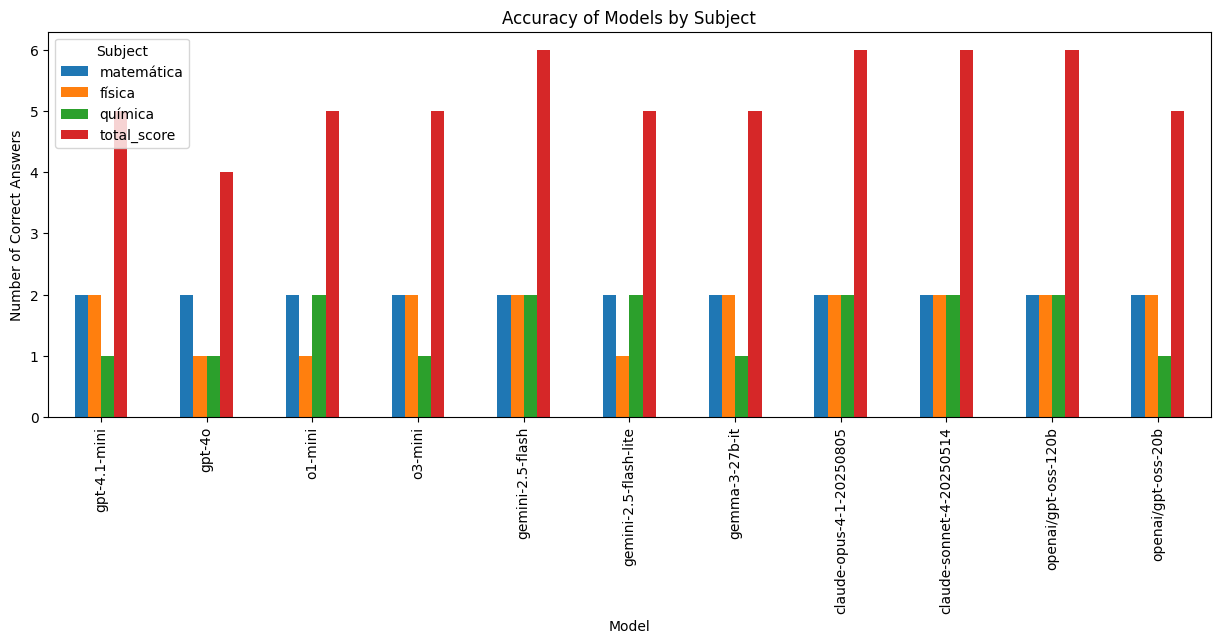

In [43]:
# Convertingthe accuracy dictionary to a DataFrame
df_accuracy = pd.DataFrame(accuracy).T

# Plot the accuracy results as a bar chart
df_accuracy.plot(kind='bar', figsize=(15, 5))
plt.xlabel('Model')
plt.ylabel('Number of Correct Answers')
plt.title('Accuracy of Models by Subject')
plt.legend(title='Subject')
plt.show()